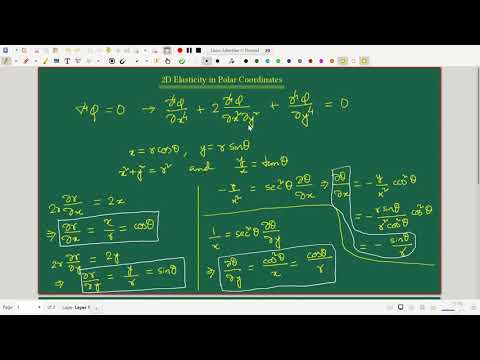

In [9]:
from IPython.display import YouTubeVideo

YouTubeVideo('FziVGXIzxKo')

### Background:
We had already derived the biharmonic equation in rectangular Cartesian coordinate system. So we know:
\begin{gather}
\nabla^4 \phi = 0, \tag{1} \\ 
\text{or,} \quad \left( \frac{\partial^4}{\partial x^4} + 2 \frac{\partial^4}{\partial x^2 \partial y^2} + \frac{\partial^4}{\partial y^4} \right) \phi = 0 \tag{2}
\end{gather}
Now, we wish to obtain the version in the polar coordinate system, i.e. the r,θ coordinate system. The whole derivation is, in essence, a transformation from the rectangular Cartesian coordinate system to the polar coordinate system. We follow the steps outlined in the classic "Theory of Elasticity" 3rd edition, by Timoshenko and Goodier.

We begin by noting that $x=r \cos\theta$ and $y=r\sin \theta$. Then, we obtain:
\begin{align}
\frac{\partial r}{\partial x} &= \cos \theta \tag{3}\\
\frac{\partial r}{\partial y} &= \sin \theta \tag{4}\\
\frac{\partial \theta}{\partial x} & = - \frac{\sin \theta}{r} \tag{5} \\
\frac{\partial \theta}{\partial y} & = \frac{\cos \theta}{r} \tag{6} \\
\end{align}

For a generic function $f(r,\theta)$, we have
\begin{align}
\frac{\partial f}{\partial x} &= \frac{\partial f}{\partial r}\frac{\partial r}{\partial x} + \frac{\partial f}{\partial \theta}\frac{\partial \theta}{\partial x} \tag{7} \\
\frac{\partial f}{\partial y} &= \frac{\partial f}{\partial r}\frac{\partial r}{\partial y} + \frac{\partial f}{\partial \theta}\frac{\partial \theta}{\partial y} \tag{8}
\end{align}

Up to this point, we could easily proceed "by hand". However, our final aim is to obtain the polar coordinate versions of \begin{align}\frac{\partial^4 f}{\partial x^4}, \frac{\partial^4 f}{\partial x^2\partial y^2}, \frac{\partial^4 f}{\partial y^4} \end{align}Doing these by hand involves a lot of time and effort.

However, we can take advantage of the power of SymPy to automate these derivations.

### Definitions in SymPy
We begin by invoking SymPy and defining the symbols r and θ.

In [10]:
from sympy import *
from IPython.display import Math, Latex

r, theta = symbols('r, theta')

We define a generic function $f(r,\theta)$ as:

We then write the definitions as in Eqs (3)-(6):

In [11]:
phi = Function('phi')(r, theta)
display(r, theta, phi)

r

theta

phi(r, theta)

In [12]:
delr_delx = cos(theta)

delr_dely = sin(theta)

deltheta_delx = -sin(theta)/r

deltheta_dely = cos(theta)/r

display(Math(r'\partial r/\partial x = {}'.format(latex(delr_delx))))
display(Math(r'\partial r/\partial y = {}'.format(latex(delr_dely))))
display(Math(r'\partial \theta/\partial x = {}'.format(latex(deltheta_delx))))
display(Math(r'\partial \theta/\partial y = {}'.format(latex(deltheta_dely))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

And, then we write the definitions as in Eqs (7) and (8):

In [13]:
def del_delx(f):
    return delr_delx*diff(f,r) + deltheta_delx*diff(f,theta)

def del_dely(f):
    return delr_dely*diff(f,r) + deltheta_dely*diff(f,theta)

Up to this point, we have merely translated the equations which we had obtained by hand into the language of SymPy. However, we are now at the point where we need to find the second order derivatives. These we shall obtain not by hand, but by using the power of SymPy by making the definitions of the first order derivatives operate on themselves. Thus:

In [14]:
def del2_delx2(f):
    return del_delx(del_delx(f))

def del2_dely2(f):
    return del_dely(del_dely(f))

#### Definition of the polar biharmonic
We finally wish to go to the biharmonic equation. But for that we need not explicitly find the third order derivatives and then the fourth order derivatives. Instead, we can define the polar version of the Laplacian operator $\frac{\partial^2 f}{\partial x^2}$+$\frac{\partial^2 f}{\partial y^2}$ as follows:

In [15]:
def polarLapacian(f):
    return (del2_delx2(f) + del2_dely2(f)).simplify()

That's the definition. But, let's check what the polar Laplacian looks. For that, we first set up a generic function, $\phi(r,\theta)$, and operate the polarLaplacian function on it:

In [16]:
polarLapacian(phi)

Derivative(phi(r, theta), (r, 2)) + Derivative(phi(r, theta), r)/r + Derivative(phi(r, theta), (theta, 2))/r**2

We can now immediately go to the polar version of the biharmonic operator by making the Laplacian operator operate on itself. Thus:

In [17]:
def  polarbiharmonic(f):
    return polarLapacian(polarLapacian(f))

In [18]:
polarbiharmonic(phi)

(r**4*Derivative(phi(r, theta), (r, 4)) + 2*r**3*Derivative(phi(r, theta), (r, 3)) - r**2*Derivative(phi(r, theta), (r, 2)) + 2*r**2*Derivative(phi(r, theta), (r, 2), (theta, 2)) + r*Derivative(phi(r, theta), r) - 2*r*Derivative(phi(r, theta), r, (theta, 2)) + 4*Derivative(phi(r, theta), (theta, 2)) + Derivative(phi(r, theta), (theta, 4)))/r**4

Now, imagine obtaining this by hand!

However, our work is far from over. To address a full-scale problem from 2D elasticity, we have to solve the polar biharmonic equation subject to certain boundary conditions. These boundary conditions are often expressed in terms of the stress fields. So, we need to find the relations between the stresses and the Airy stress function.

Definition of the stresses in polar coordinates
To find the relations between the stresses and the Airy stress function in the polar coordinate system, we proceed again by transforming from the rectangular Cartesian coordinate system. This transformation involves two steps.

First step: Obtain the expressions of $\sigma_{xx} = \frac{\partial^2 \phi}{\partial y^2}$, $\sigma_{yy} = \frac{\partial^2 \phi}{\partial x^2}$, and $\sigma_{xy} = -\frac{\partial^2 \phi}{\partial x \partial y}$ in terms of the corresponding derivatives of the Airy stress function in polar coordinates.

Second step: Transform the stress matrix $\bar{\bar{\sigma}}_{\rm rect} = \begin{bmatrix} \sigma_{xx} & \sigma_{xy} \\ \sigma_{xy} & \sigma_{yy}\end{bmatrix}$ to $\bar{\bar\sigma}_{\rm pol} = \begin{bmatrix} \sigma_{rr} & \sigma_{r\theta} \\ \sigma_{r\theta} & \sigma_{\theta\theta}\end{bmatrix}$ through the rotation matrix $\bar{\bar{Q}} = \displaystyle \begin{bmatrix} \cos \theta & \sin \theta \\ -\sin \theta & \cos \theta \end{bmatrix}$ using the relation:

\begin{gather}
\bar{\bar{\sigma}}_{\rm pol} = \bar{\bar{Q}} \; \bar{\bar{\sigma}}_{\rm rect} \; \bar{\bar{Q}}^{\sf T}
\end{gather}

On to the implementation of the **First step** now:

In [19]:
def sigma_xx(f):
    return del2_dely2(f)

def sigma_yy(f):
    return del2_delx2(f)

def sigma_xy(f):
    return -del_delx(del_dely(f))

Using the above definitions, we set up $\bar{\bar{\sigma}}_{\rm rect}$ and the rotation matrix $\bar{\bar{Q}}$:

In [20]:
def sigma_rect(f):
    return Matrix([[sigma_xx(f), sigma_xy(f)],[sigma_xy(f), sigma_yy(f)]])

Q = Matrix([[cos(theta), sin(theta)],[-sin(theta), cos(theta)]])

We next implement the **Second step** as:

In [21]:
def sigma_polar(f):
    return Q*sigma_rect(f)*(Q.T)

And, finally extract the individual components $\sigma_{rr}, \sigma_{\theta\theta}$ and $\sigma_{r\theta}$:

In [22]:
def sigma_rr(f):
    return sigma_polar(f)[0,0].simplify().expand()

def sigma_tt(f):
    return sigma_polar(f)[1,1].simplify()

def sigma_rt(f):
    return sigma_polar(f)[0,1].simplify().expand()

def sigma_tr(f):
    return sigma_polar(f)[1,0].simplify().expand()

Note that in the above definitions, we have additionally invoked the simplification and expansion functionality that SymPy allows to make the expressions of the stress fields less daunting. It is important to note that it is not just a matter of aesthetics to present these expressions in the simplest possible terms. It does matter for latter operations that the expressions indeed are simple and amenable for solving problems. But before launching into problems, let us display the stress components:

In [24]:
display(sigma_rr(phi))
display(sigma_tt(phi))
display(sigma_rt(phi))

Derivative(phi(r, theta), r)/r + Derivative(phi(r, theta), (theta, 2))/r**2

Derivative(phi(r, theta), (r, 2))

-Derivative(phi(r, theta), r, theta)/r + Derivative(phi(r, theta), theta)/r**2

We can clearly see that sigma_tr(phi) is exactly the same as sigma_rt(phi), as was to be expected based on the symmetricity of the stress tensor.